Nosso problema é analizar dados de uso de bicicleta a apartir de varias informações, nos temos "três" variaveis para prever:
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

    sendo que a ultima é a soma das duas anteriores

Nos podemos ajustar dois modelos ou apenas um, temos os dados do clima por dia e por hora, o que dá para ajustar dosi modelos se quisermos.

juro que nunca vi um dado mais bem tratado do que esse, simplesmente LINDOOO

In [150]:
import os

import pandas               as pd 
import numpy                as np 
import seaborn              as sns 
import matplotlib.pyplot    as plt

In [151]:
# vou  fazer a primeira analize do dado

file_path = os.path.dirname(os.getcwd())

day     = pd.read_csv(file_path + r'\Dados\day.csv', index_col='instant')
hour    = pd.read_csv(file_path + r'\Dados\hour.csv', index_col='instant')

hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [152]:
print(hour.isnull().values.any(),
day.isnull().values.any())

print(hour.isna().values.any(),
day.isna().values.any())

#não tem dados vazios

False False
False False


In [153]:
#vou jundar a coluna da hora e data e fazer uma nova coluna, DT_HR
hour['dteday'] =  pd.to_datetime(hour['dteday'], format="%Y-%m-%d")
day['dteday'] =  pd.to_datetime(day['dteday'], format="%Y-%m-%d")

hour['DT_HR'] = hour['dteday'] + pd.to_timedelta(hour['hr'], unit='h')

In [154]:
day['casual_moving_avg'] = day['casual'].rolling(window=15).mean()
day['registered_moving_avg'] = day['registered'].rolling(window=15).mean()
day['cnt_moving_avg'] = day['cnt'].rolling(window=15).mean()

<Axes: xlabel='dteday', ylabel='casual'>

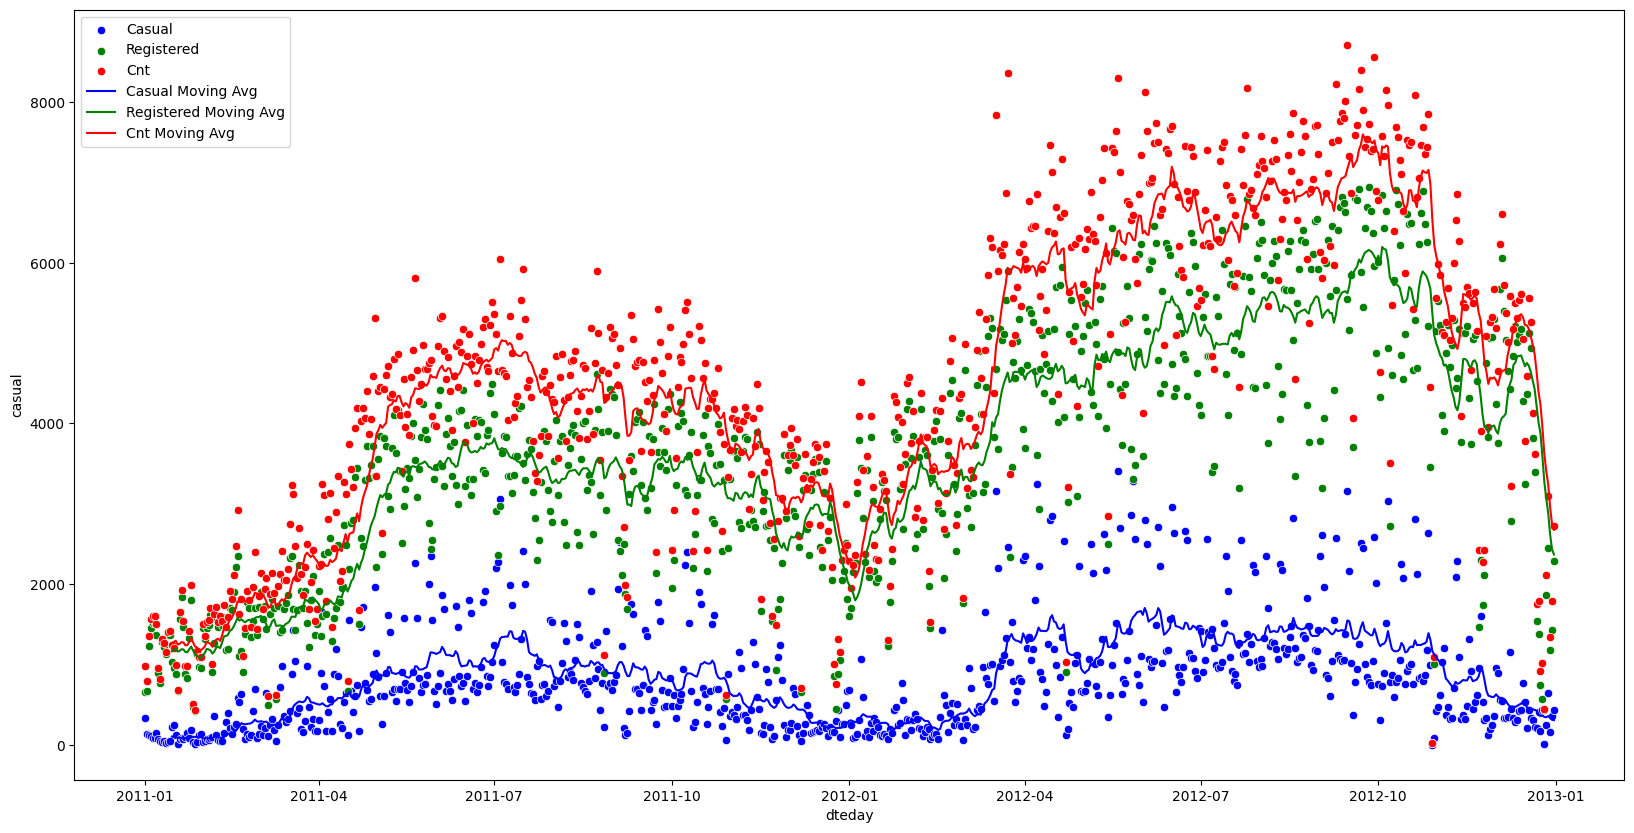

In [216]:
plt.figure(figsize=(20, 10))

sns.scatterplot(data=day, x='dteday', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='dteday', y='registered', label='Registered', marker='o', color='green')
sns.scatterplot(data=day, x='dteday', y='cnt', label='Cnt', marker='o', color='red')

sns.lineplot(data=day, x='dteday', y='casual_moving_avg', label='Casual Moving Avg', color='blue', linestyle='-')
sns.lineplot(data=day, x='dteday', y='registered_moving_avg', label='Registered Moving Avg', color='green', linestyle='-')
sns.lineplot(data=day, x='dteday', y='cnt_moving_avg', label='Cnt Moving Avg', color='red', linestyle='-')


<Axes: xlabel='temp', ylabel='casual'>

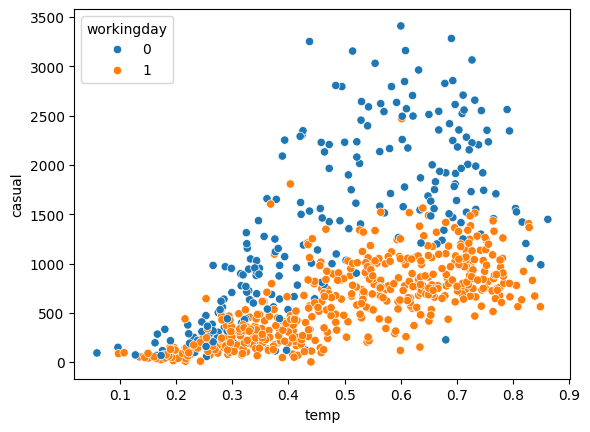

In [156]:

sns.scatterplot(data=day, x='temp', y='casual', marker='o', hue='workingday')



<Axes: xlabel='temp', ylabel='registered'>

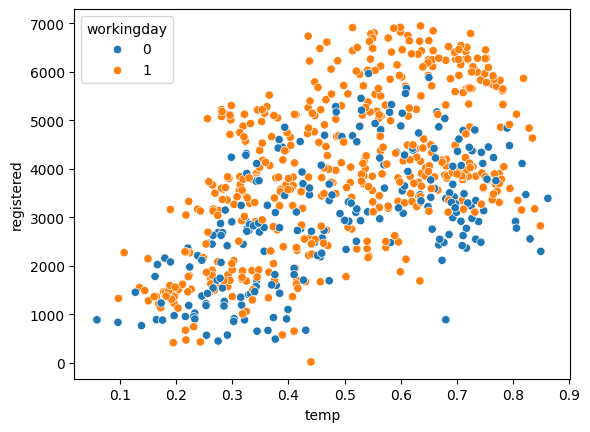

In [157]:
sns.scatterplot(data=day, x='temp', y='registered', marker='o', hue='workingday')

<Axes: xlabel='atemp', ylabel='temp'>

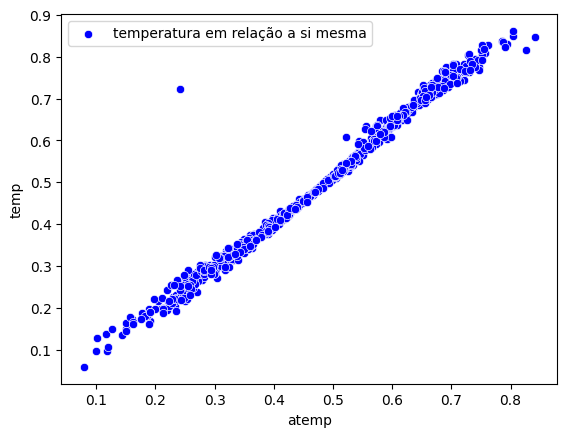

In [158]:
sns.scatterplot(data=day, x='atemp', y='temp', label='temperatura em relação a si mesma', marker='o', color='blue')
#dados extremamente correlacionados, pode tirar um

<Axes: xlabel='hum', ylabel='temp'>

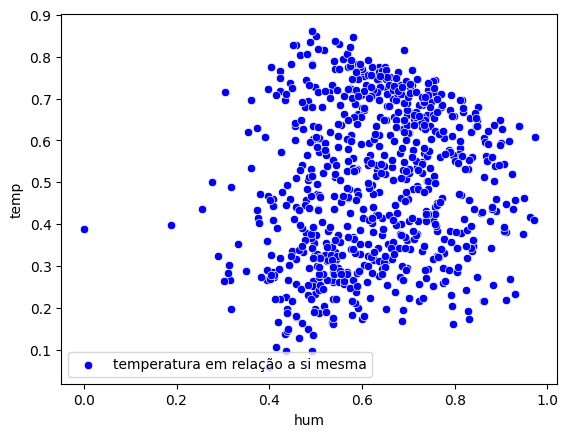

In [159]:
sns.scatterplot(data=day, x='hum', y='temp', label='temperatura em relação a si mesma', marker='o', color='blue')

<Axes: xlabel='hum', ylabel='casual'>

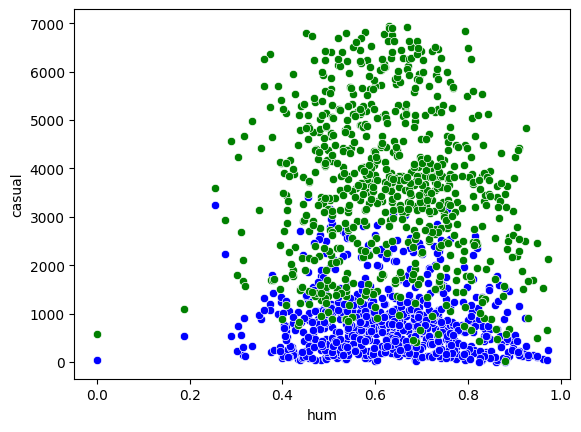

In [160]:
sns.scatterplot(data=day, x='hum', y='casual', marker='o', color='blue')
sns.scatterplot(data=day, x='hum', y='registered', marker='o', color='green')


<Axes: xlabel='registered', ylabel='casual'>

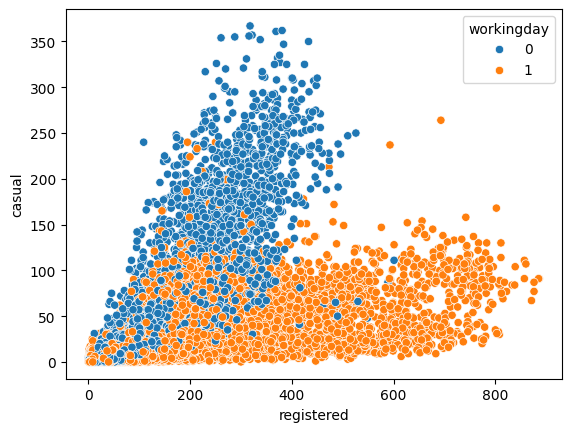

In [161]:
sns.scatterplot(data=hour, x='registered', y='casual', marker='o', hue='workingday')

<Axes: xlabel='windspeed', ylabel='casual'>

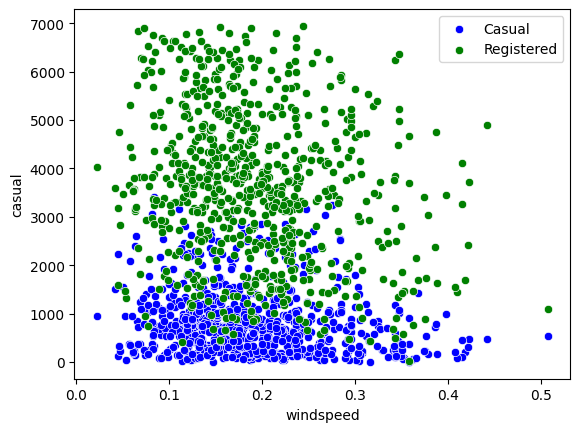

In [162]:
sns.scatterplot(data=day, x='windspeed', y='casual', label='Casual', marker='o', color='blue')
sns.scatterplot(data=day, x='windspeed', y='registered', label='Registered', marker='o', color='green')

<Axes: xlabel='windspeed', ylabel='hum'>

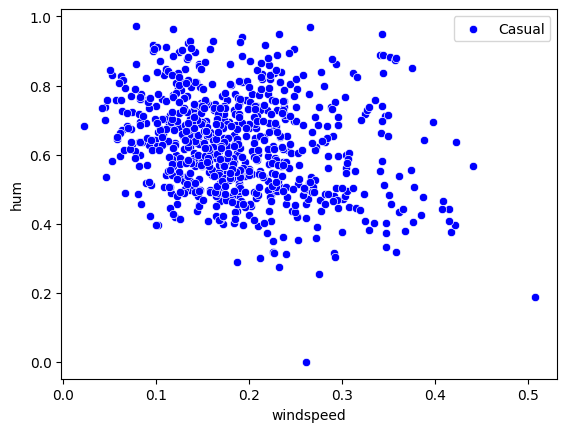

In [163]:
sns.scatterplot(data=day, x='windspeed', y='hum', label='Casual', marker='o', color='blue')

<Axes: xlabel='windspeed', ylabel='temp'>

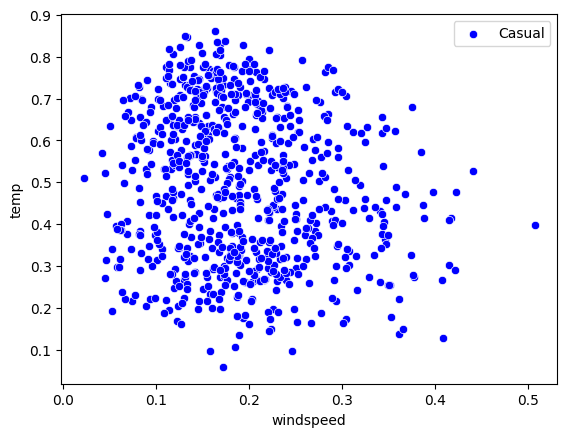

In [164]:
sns.scatterplot(data=day, x='windspeed', y='temp', label='Casual', marker='o', color='blue')

detalhe importante, não podemos ver os dados climaticos como dados da tabela hour, apenas da tabela day, do caontrario as poucas relaçõs que existem vao desaparecer 

<Axes: xlabel='weekday', ylabel='registered'>

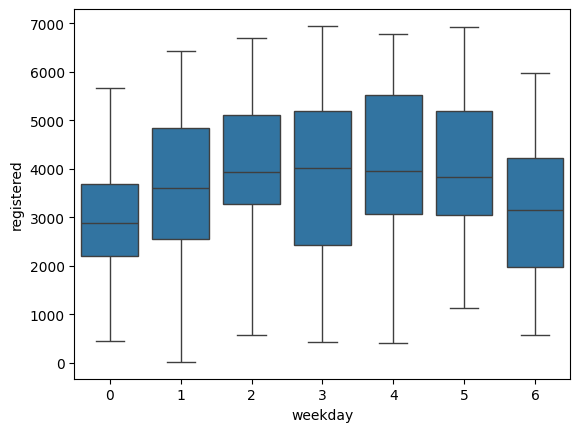

In [165]:
sns.boxplot(data=day, x='weekday', y='registered')

<Axes: xlabel='weekday', ylabel='casual'>

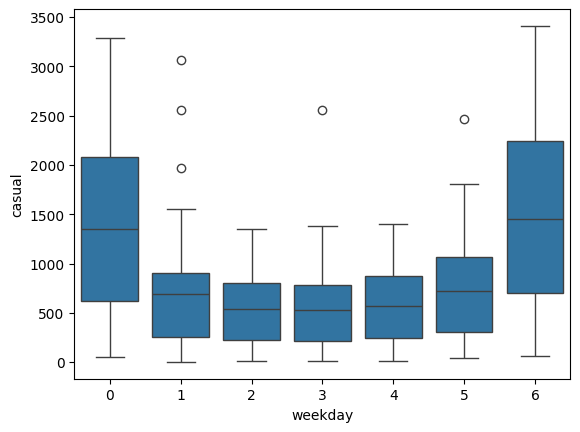

In [166]:
sns.boxplot(data=day, x='weekday', y='casual')

<Axes: xlabel='workingday', ylabel='Quantidade'>

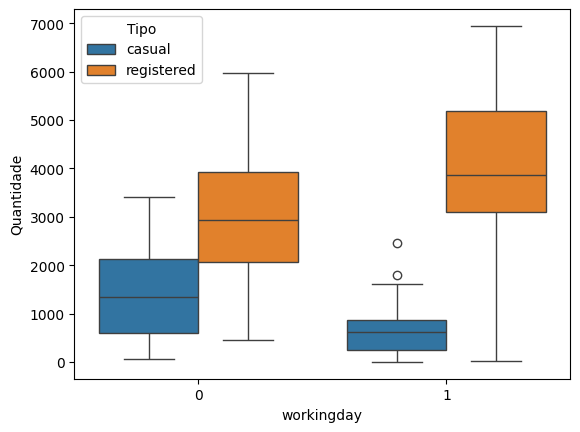

In [167]:
day_long = day.melt(id_vars=['workingday'], value_vars=['casual', 'registered'], 
                    var_name='Tipo', value_name='Quantidade')

sns.boxplot(data=day_long, x='workingday', y='Quantidade', hue='Tipo')

<Axes: xlabel='season', ylabel='Quantidade'>

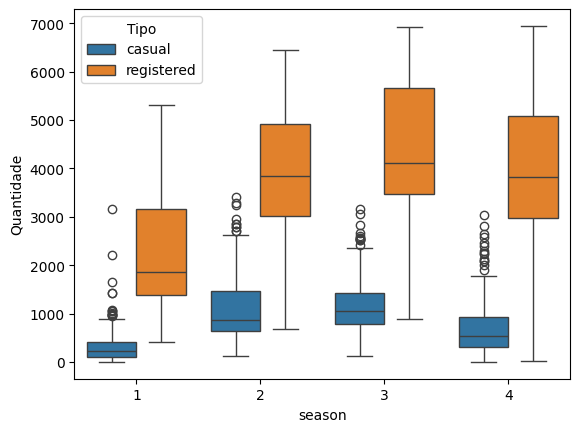

In [169]:
season_long = day.melt(id_vars=['season'], value_vars=['casual', 'registered'], 
                    var_name='Tipo', value_name='Quantidade')

sns.boxplot(data=season_long, x='season', y='Quantidade', hue='Tipo')

<Axes: xlabel='weathersit', ylabel='Quantidade'>

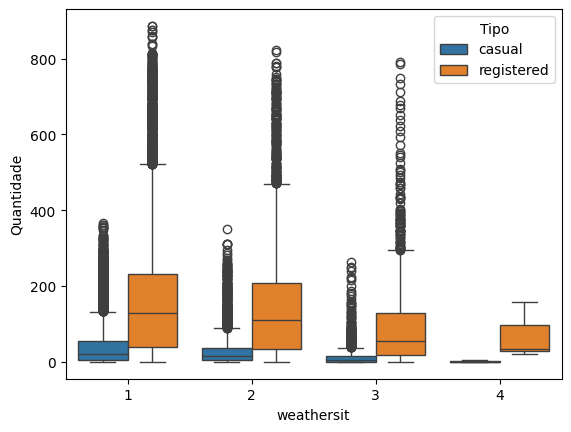

In [171]:
weathersit_long = hour.melt(id_vars=['weathersit'], value_vars=['casual', 'registered'], 
                    var_name='Tipo', value_name='Quantidade')

sns.boxplot(data=weathersit_long, x='weathersit', y='Quantidade', hue='Tipo')

<Axes: xlabel='weathersit', ylabel='Quantidade'>

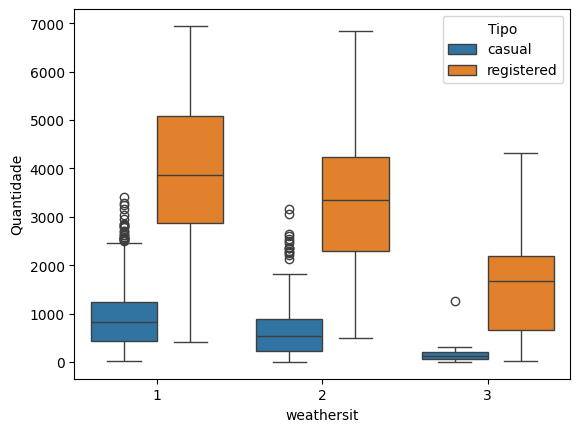

In [172]:
weathersit_long = day.melt(id_vars=['weathersit'], value_vars=['casual', 'registered'], 
                    var_name='Tipo', value_name='Quantidade')

sns.boxplot(data=weathersit_long, x='weathersit', y='Quantidade', hue='Tipo')

<Axes: xlabel='temp', ylabel='casual'>

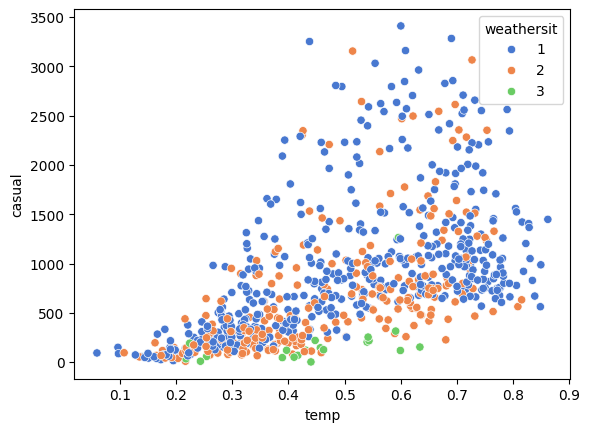

In [179]:
sns.scatterplot(data=day, hue='weathersit', x='temp', y='casual', palette='muted')

<Axes: xlabel='temp', ylabel='registered'>

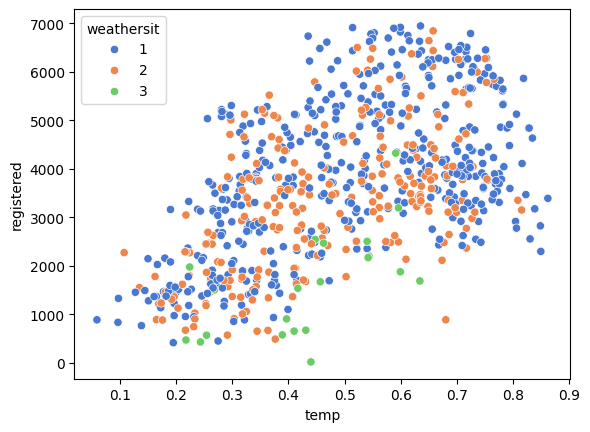

In [181]:
sns.scatterplot(data=day, hue='weathersit', x='temp', y='registered', palette='muted')

<Axes: xlabel='hr', ylabel='casual'>

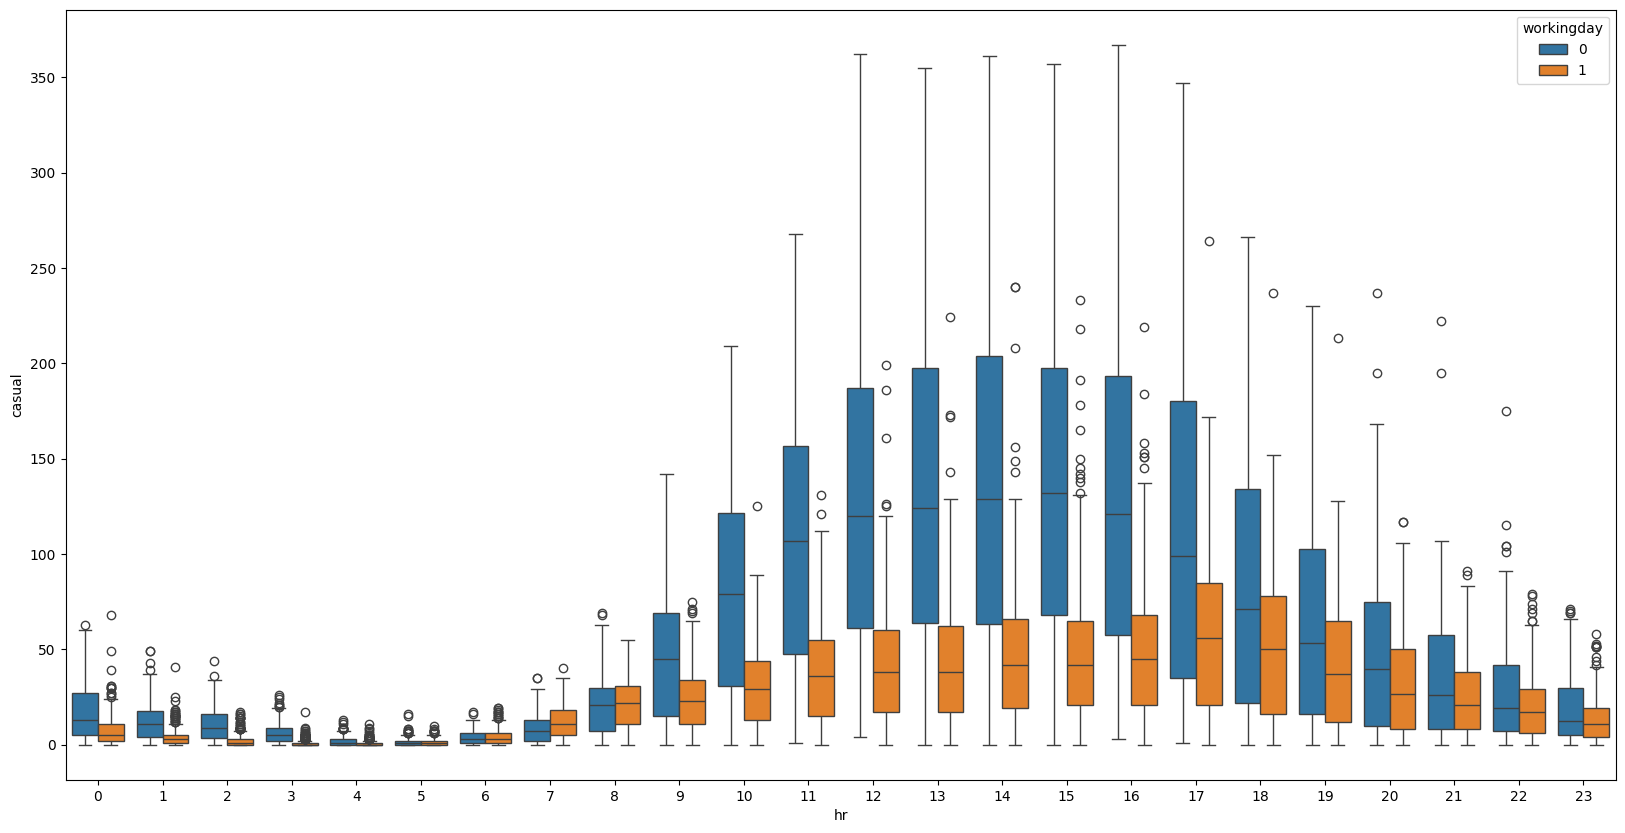

In [191]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=hour, x='hr', y='casual', hue='workingday')

<Axes: xlabel='hr', ylabel='registered'>

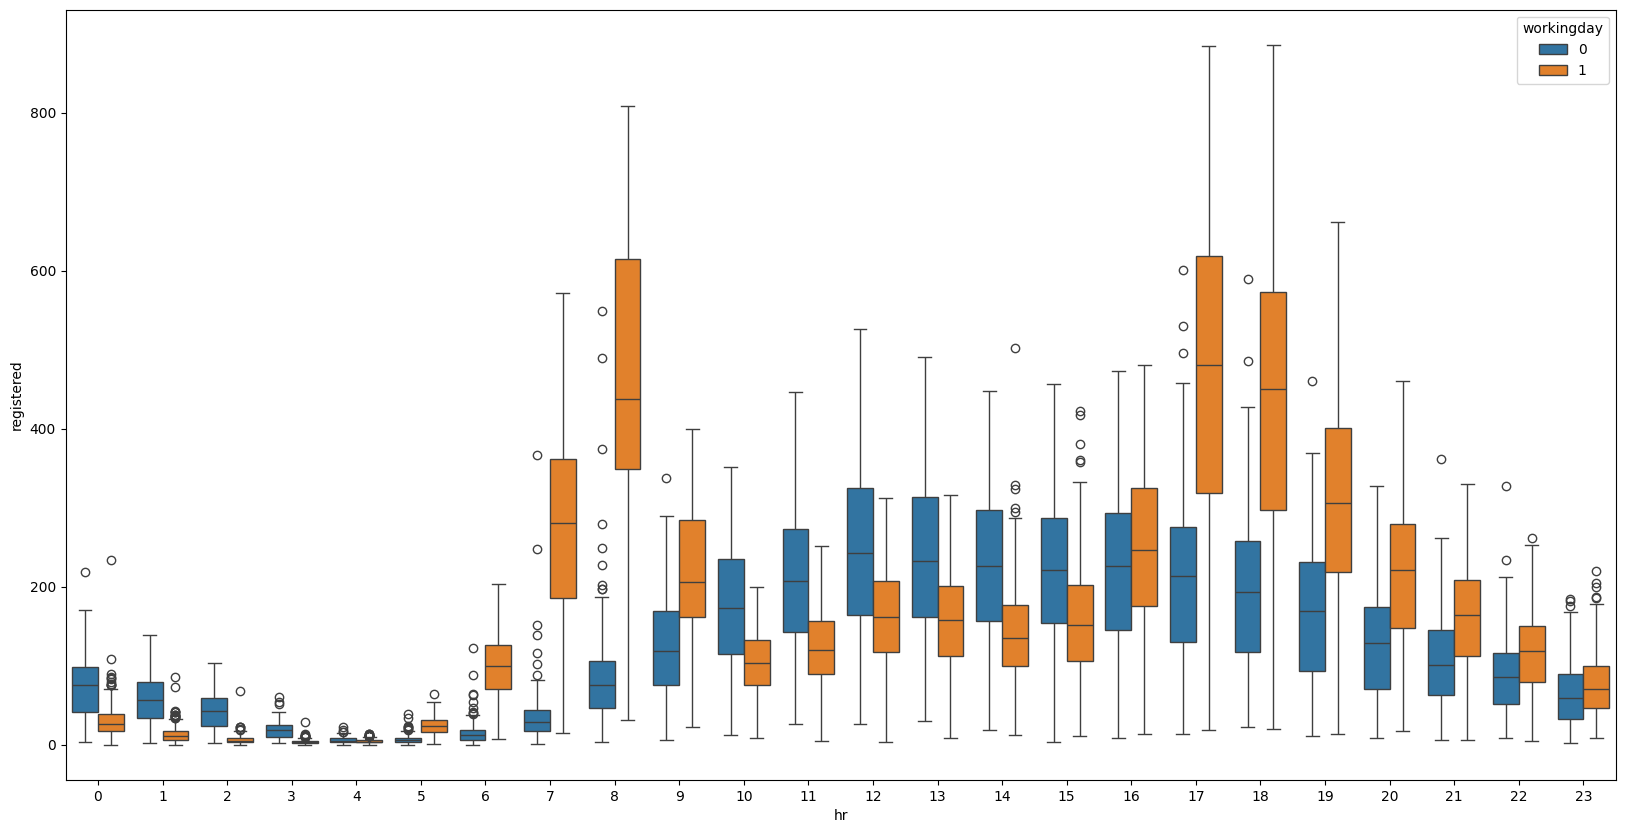

In [192]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=hour, x='hr', y='registered', hue='workingday')

<Axes: xlabel='hr', ylabel='casual'>

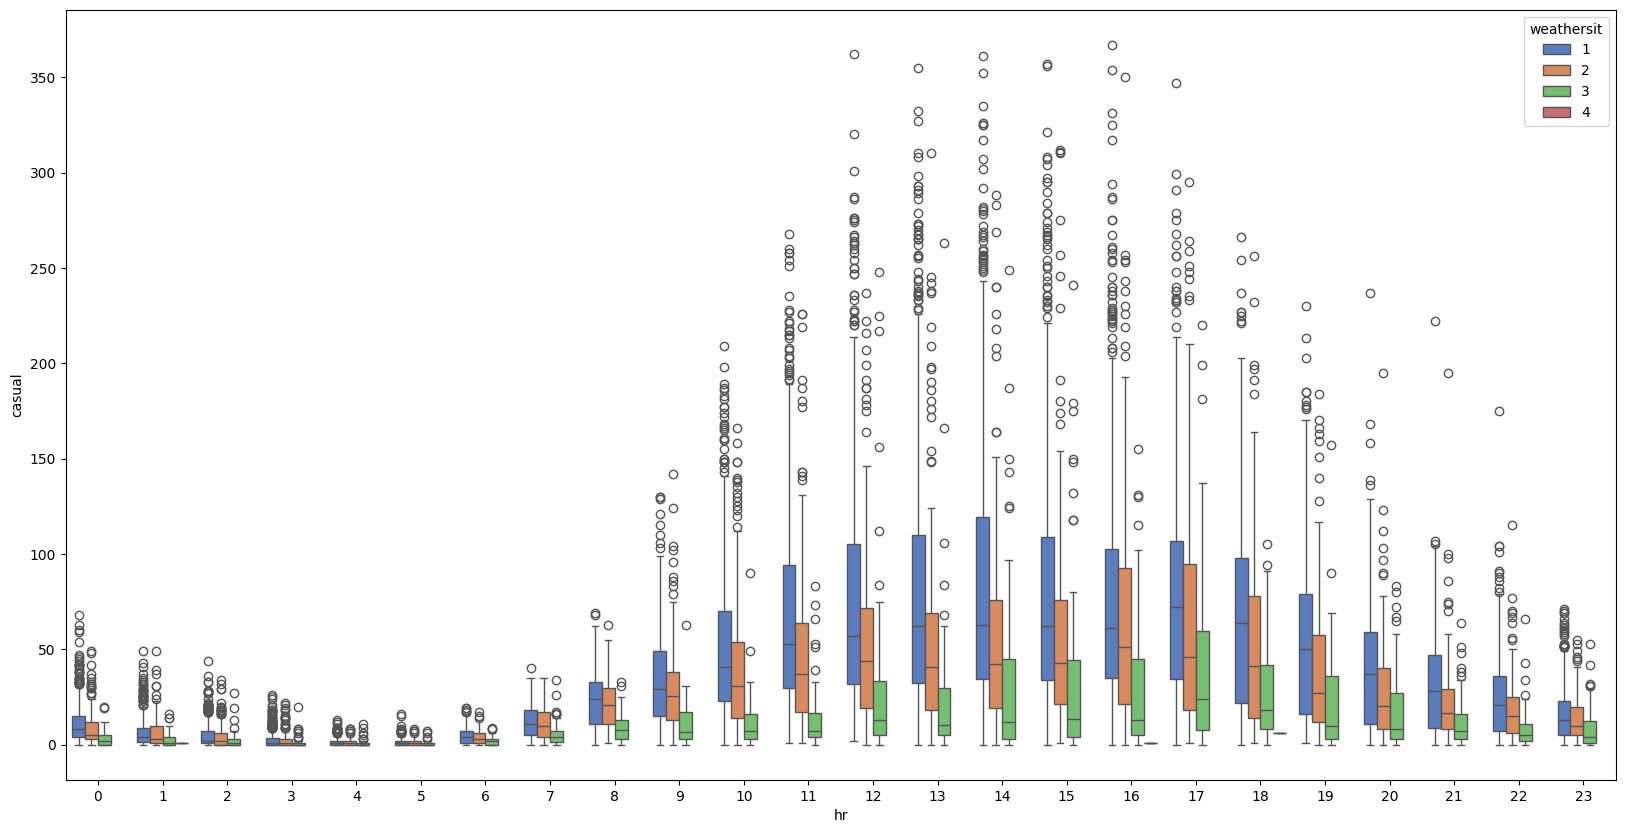

In [200]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=hour, x='hr', y='casual', hue='weathersit', palette='muted')

<Axes: xlabel='hr', ylabel='registered'>

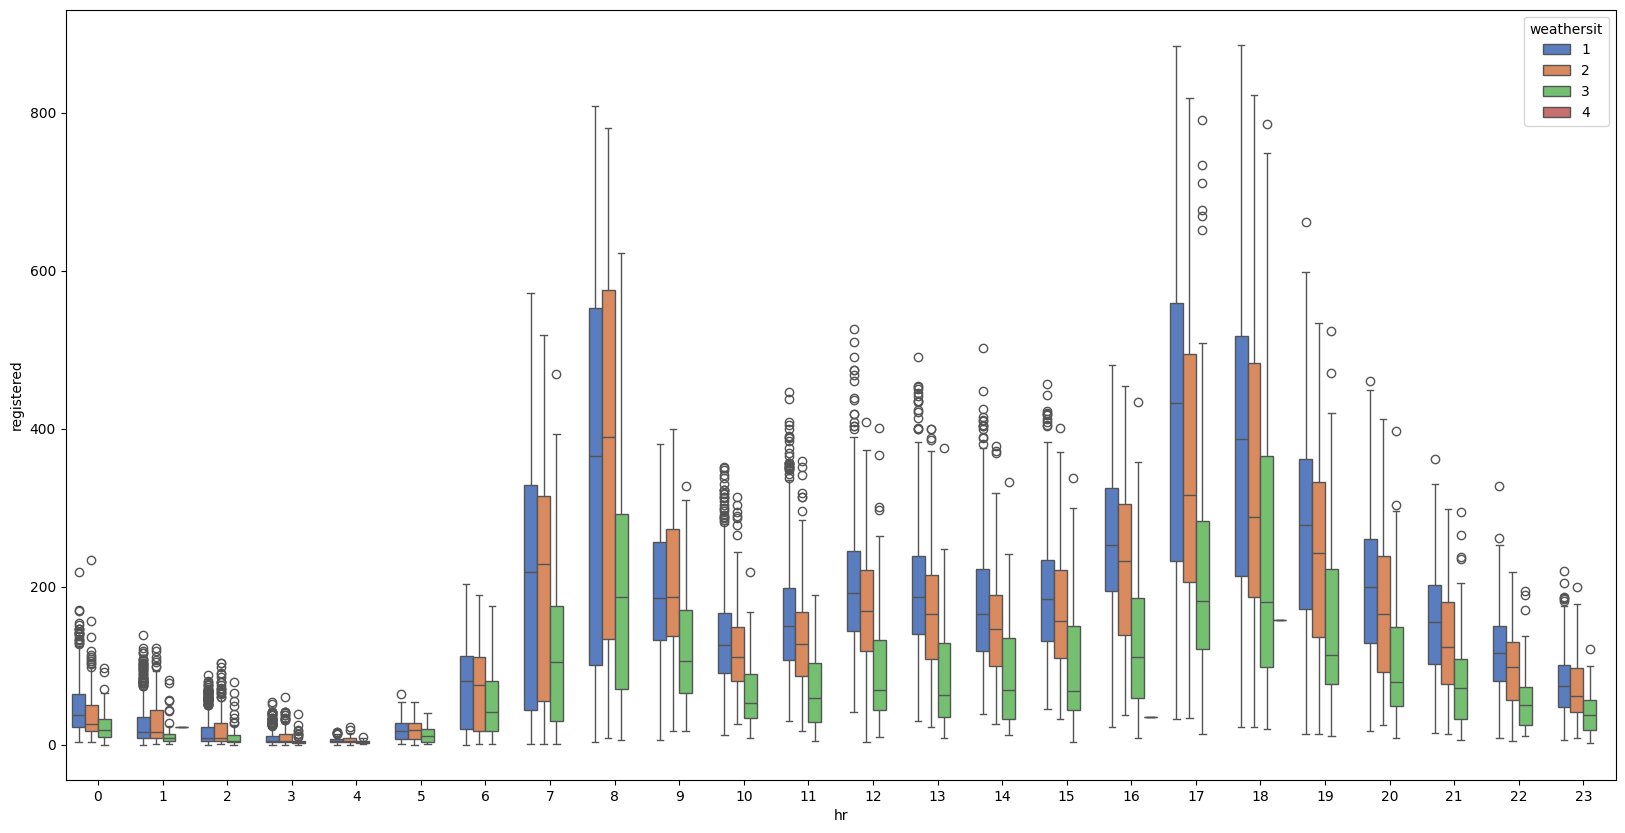

In [201]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=hour, x='hr', y='registered', hue='weathersit', palette='muted')

<Axes: xlabel='weathersit', ylabel='casual'>

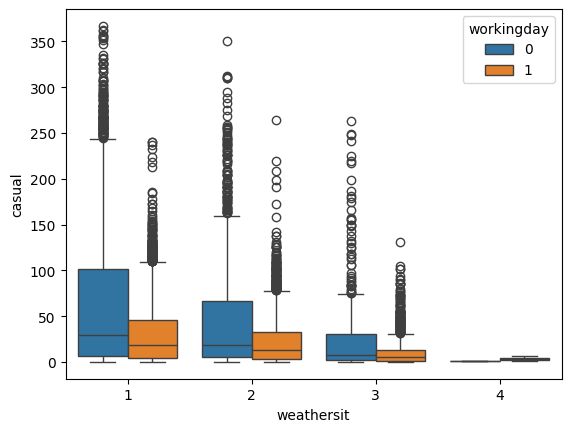

In [199]:
sns.boxplot(data=hour, x='weathersit', hue='workingday', y='casual')

<Axes: xlabel='weathersit', ylabel='registered'>

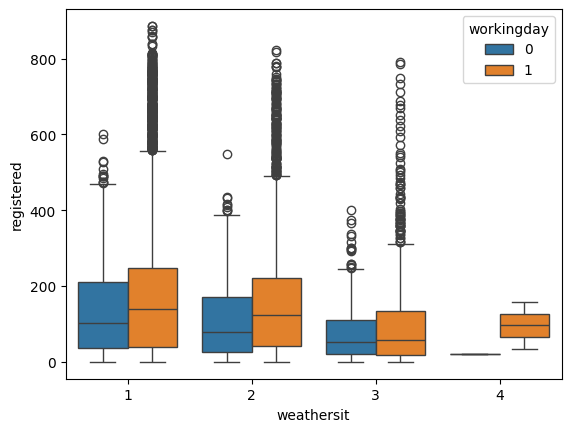

In [202]:
sns.boxplot(data=hour, x='weathersit', hue='workingday', y='registered')

<Axes: xlabel='hr', ylabel='temp'>

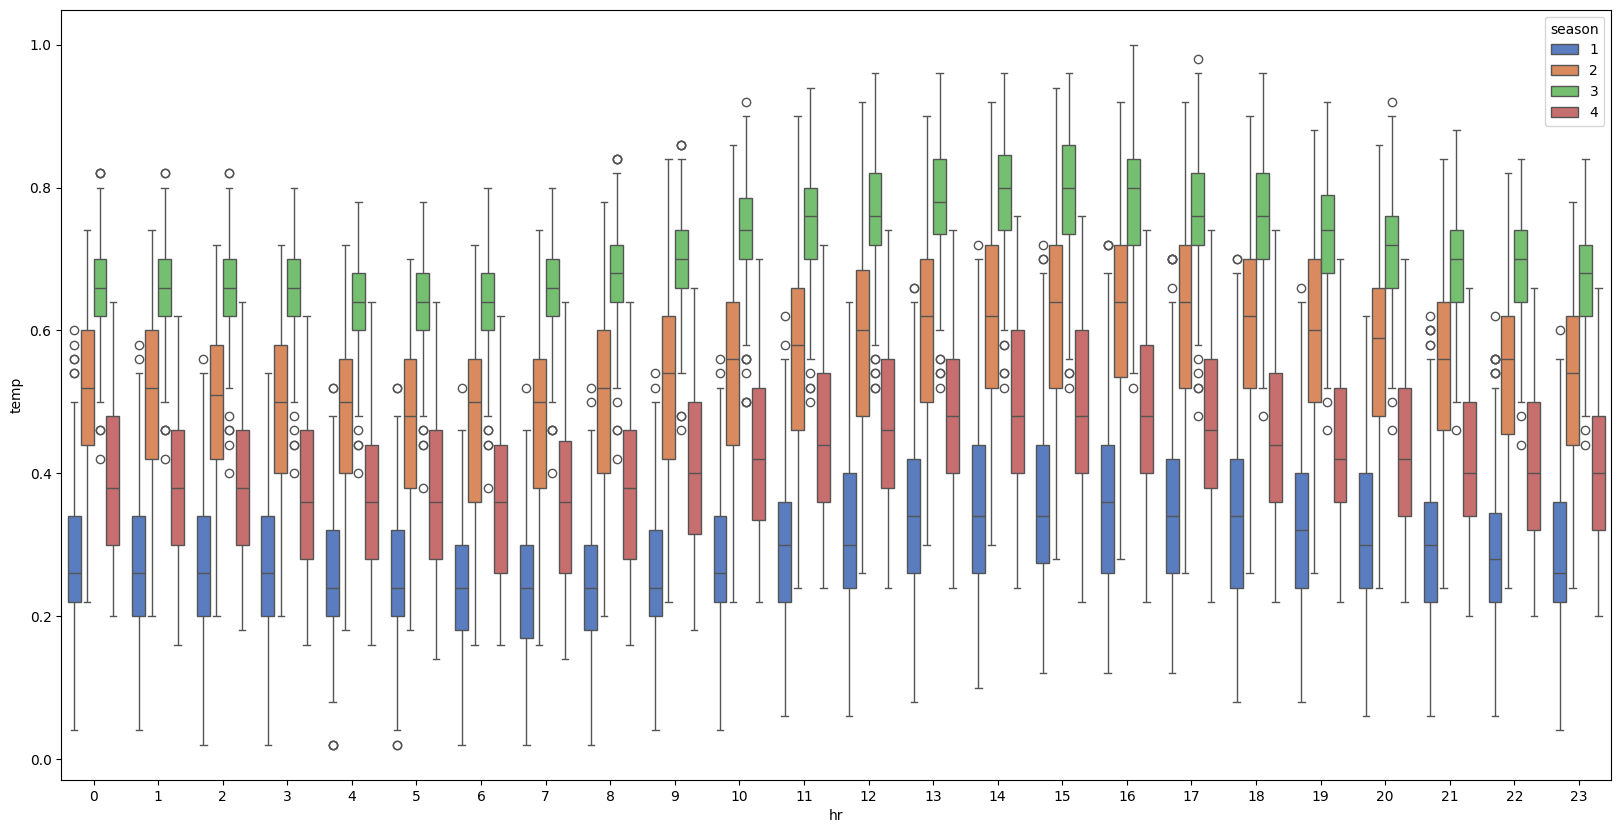

In [ ]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=hour, x='hr', y='temp', hue='season', palette='muted')
#nn é inutil eu tô tentando ver se as estações mudando apresentam um diferente padão de temperatura
#eu quero entender se a temperatura ao logo do dia é um fator

<Axes: xlabel='hr', ylabel='temp'>

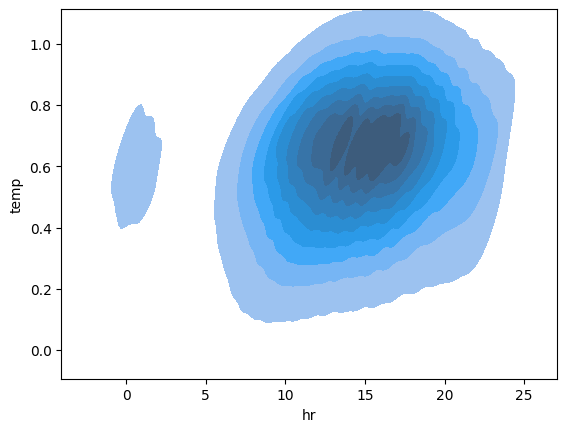

In [ ]:
sns.kdeplot(data=hour,x='hr',y='temp',weights='casual',  fill=True)#esse caso não faz diferença se é feriado ou não


<Axes: xlabel='hr', ylabel='temp'>

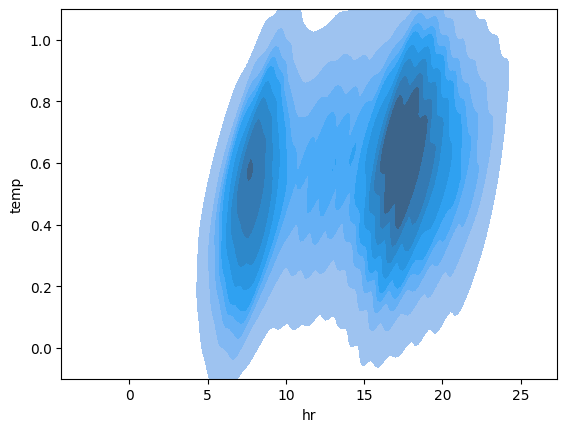

In [248]:
sns.kdeplot(data=hour[hour['workingday']==1], x='hr',y='temp',weights='registered',  fill=True)

<Axes: xlabel='hr', ylabel='temp'>

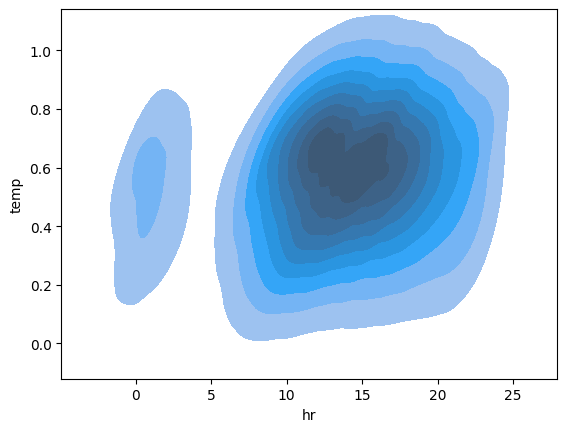

In [249]:
sns.kdeplot(data=hour[hour['workingday']==0], x='hr',y='temp',weights='registered',  fill=True)